In [21]:
#import necessary packages
!apt-get -qq install python-cartopy python3-cartopy
import cartopy
!pip install pykrige
# Now let's import packages
import pandas as pd
import matplotlib.pyplot as plt
import pylab #using as a plotting library for spatial data, make contours
import numpy as np #gridded datasets and matrices; array package
import matplotlib as mp

# import cartopy, which we will use to map
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features


# import the UniversalKriging function from pykrige.uk 
from pykrige.uk import UniversalKriging

!pip install pyproj
from pyproj import Proj, transform

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Firas-95/GEO572-Project-E.St.Louis/class_example/yiquan/pumping/Modified_Pumpage_Data_ESL.csv') #read modified pumpage data

In [0]:
# drop lines with no latitude and longtitude records
list_drop = [] 
for ind, row in df.iterrows():
    if df.iloc[ind, 5:6].isnull().values.all():
        list_drop.append(ind)
df = df.drop(list_drop)

# drop data from other years except the years 1986 and 2013
df = df.drop(df.iloc[:,7:12],axis=1)
df = df.drop(df.iloc[:,8:34],axis=1)
df = df.drop(df.iloc[:,9:],axis=1)

In [0]:
illimap= {'proj': 'lcc', # Lambert Conformal Conic
     'ellps': 'clrk66', #Clarke 1866 ellipsoid
     'lon_0': -89.5, #Central Meridian
     'lat_0': 33, #Latitude of Origin
     'lat_1': 33, #Standard Parallel 1
     'lat_2': 45, #Standard Parallel 2
     'x_0': 2999994*0.3048006096012192, #starting x-coord. in ft, python expects m
     'y_0': 0} #starting y-coord.

inProj = Proj(illimap) #define input projection
outProj = Proj('epsg:4326') #define output projection

In [5]:
Latitude=[] 
Longitude=[]
for index, row in df.iterrows():
  Long1,Lat1 = 0.3048006096012192*int(row['lam_x']),0.3048006096012192*int(row['lam_y']) #define input coordinates; convert lambert ft to m
  Long2,Lat2 = transform(inProj,outProj,Long1,Lat1) #convert from lambert to wgs84
  Latitude.append(Lat2) #add latitude data to empty Latitude=[] array
  Longitude.append(Long2) #add longitude data to empty Longitude=[] array
df['Latitude']=Latitude
df['Longitude']=Longitude
df2=df.drop(['lam_x','lam_y','owner','fac_well_num'],axis=1)
print(df2)

      p_num  isws_facility_id  ...   Latitude  Longitude
0    296811        11970015.0  ... -90.147063  38.661093
3    314847        11938020.0  ... -90.133395  38.878617
5    348353        13370020.0  ... -90.310312  38.203936
6    400115        11990250.0  ... -90.039216  38.793968
7    400116        11990250.0  ... -90.040779  38.794008
..      ...               ...  ...        ...        ...
296  437027        11970015.0  ... -90.147063  38.661093
297  442583        11994280.0  ... -90.022880  38.657308
313  464421        13370001.0  ... -90.325184  38.336403
323  465066        11938560.0  ... -90.090428  38.836282
330  486823        13370009.0  ... -90.295906  38.419336

[148 rows x 7 columns]


In [0]:
#Domain of project
sw_lat = 38.9167 #southwest latitude
sw_long =  -90.2333 #southwest longitude
ne_lat =  38.4833 #northeast latitude
ne_long = -89.9167 #northeast longitude

In [0]:
minlat = 38.4
maxlat = 39
minlong = -90.25
maxlong = -89.85

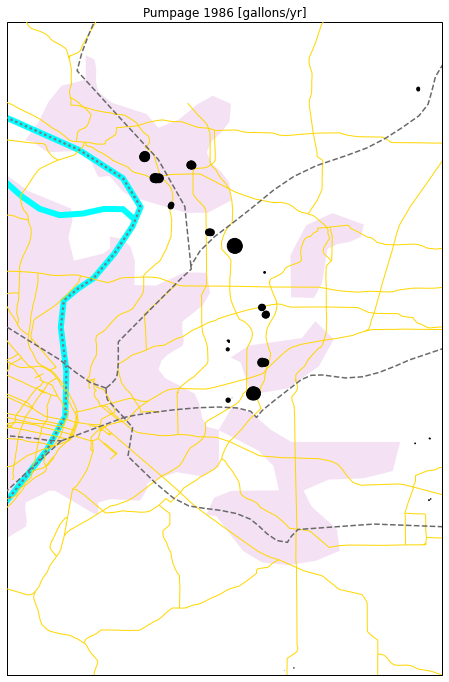

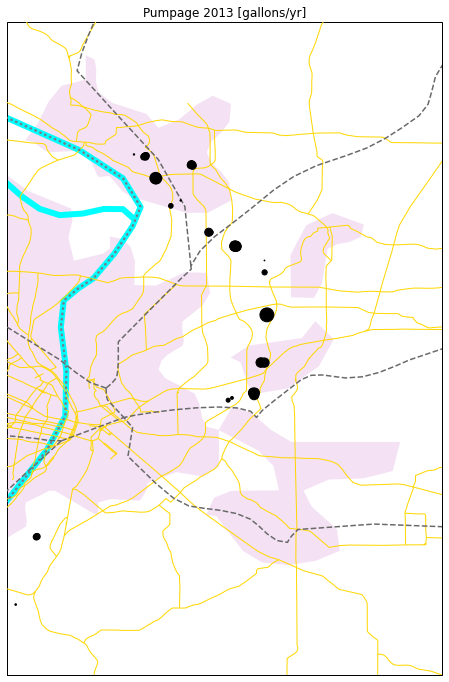

In [25]:
def pumpage_plotter(year):
  fig = plt.figure(figsize=(12,12),facecolor="white")
  ax = plt.axes(projection=ccrs.PlateCarree())
  ax.set_xlim(minlong,maxlong)
  ax.set_ylim(minlat,maxlat)
  states_provinces = cf.NaturalEarthFeature(
      category='cultural', # features are categorized as cultural or physical
      name='admin_1_states_provinces', # name of shapefile
      scale='10m', # scale of features
      facecolor='none')	
  smallrivers = cf.NaturalEarthFeature(
      category='physical',
      name='rivers_lake_centerlines_scale_rank',
      scale='10m', # smaller rivers
      facecolor='none')   
  popplaces = cf.NaturalEarthFeature(
      category='cultural',
      name='urban_areas', # plots municipal boundaries
      scale='10m',
      facecolor='plum')
  roads = cf.NaturalEarthFeature(
      category='cultural', # features are categorized as cultural or physical
      name='roads_north_america', # name of shapefile
      scale='10m', # scale of features
      facecolor='none') 
  railroads = cf.NaturalEarthFeature(
    category='cultural', # features are categorized as cultural or physical
    name='railroads_north_america', # name of shapefile
    scale='10m', # scale of features
    facecolor='none') 
  # adds the features defined above
  sz=(df[year].values/400000)
  plt.scatter(df2['Latitude'],df2['Longitude'],sz, marker=".", color="black", zorder=4)
  ax.add_feature(popplaces,edgecolor='plum',alpha=0.3,linewidth=0.1, zorder=1)
  ax.add_feature(smallrivers,edgecolor='aqua',linewidth=6.0, zorder=2)
  ax.add_feature(states_provinces, edgecolor='slategray', linewidth=2.0,linestyle=':',zorder=4)
  ax.add_feature(roads, edgecolor='gold', linewidth=1.0,linestyle='-',zorder=3)
  ax.add_feature(railroads, edgecolor='dimgray', linewidth=1.5,linestyle='--',zorder=3)
  plt.fill()
  plt.title('Pumpage {} (gallons/yr)'.format(year))
  plt.show()

''' Generating the maps '''
pumpage_plotter('1986')
pumpage_plotter('2013')